In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use("seaborn")

In [64]:
X = pd.read_csv("weightedX.csv").values
y = pd.read_csv("weightedY.csv").values

mu = X.mean()
std = X.std()

X = (X-mu)/std

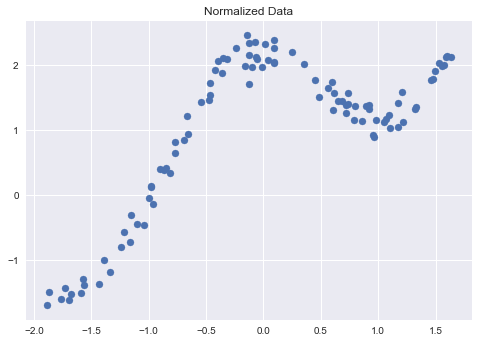

In [65]:
plt.figure()
plt.title("Normalized Data")
plt.scatter(X,y)
plt.show()

In [66]:
def getW(X,query_point,tau):
    m = X.shape[0]
    W = np.mat(np.eye(m))
    for i in range(m):
        W[i,i] = np.exp(-np.dot((X[i] - query_point),(X[i]-query_point).T)/(2*tau*tau))
    return W

In [67]:
X_ = np.mat(X)
y_ = np.mat(y)

tau=100
W = getW(X_,-1,tau)

In [68]:
def predict(X,y,query,tau):
    one = np.ones((X.shape[0],1))
    X = np.hstack((one,X))
    
    qx = np.mat([1,query])
    
    W = getW(X,qx,tau)
    
    theta = np.linalg.inv( X.T * ( W * X )) * ( ( X.T * W ) * y)
    
    pred = np.dot(qx,theta)
    return theta,pred

In [69]:
theta_list = []
pred_list = []
queryList =np.arange(-2.0,2.0,0.5)
for i in queryList:
    theta,pred = predict(X_,y,i,1.0)
    theta_list.append(theta)
    pred_list.append(pred)

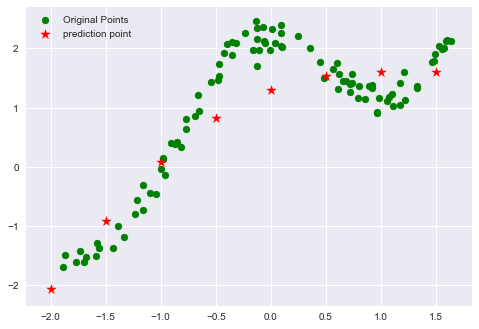

In [70]:
plt.scatter(X,y,color="green",label="Original Points")
plt.scatter(queryList,pred_list,color="red",label="prediction point",marker="*",s=100)
plt.legend()
plt.show()